In [0]:
from google.colab import drive

drive.mount('/content/gdrive')
%cd /content/gdrive/My\ Drive/Colab\ Notebooks/S7\

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
/content/gdrive/My Drive/Colab Notebooks/S7


# Import Library

In [0]:
%matplotlib inline
import torch
import torchvision
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F

In [0]:
import load_transform
# Initialize CIFAR-10 classes
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified
CUDA Available? True


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


plane   dog  deer  deer


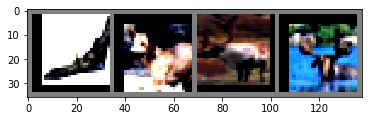

In [0]:
# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

# get some random training images
dataiter = iter(load_transform.trainloader_for_plot)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))

# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

# Import model

In [0]:
#import model
import resnet

In [0]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(f"Device: {device}")
model = resnet.ResNet18().to(device)
# if device == 'cuda':
#     model = torch.nn.DataParallel(model)
#     cudnn.benchmark = True
summary(model, input_size=(3, 32, 32))

Device: cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14      

In [0]:
# !pip install torchsummary
# from torchsummary import summary
# use_cuda = torch.cuda.is_available()
# device = torch.device("cuda" if use_cuda else "cpu")
# print(f"Device: {device}")
# model = model.Net().to(device)
# summary(model, input_size=(3, 32, 32))

# Loss Function and optimization

In [0]:
import torch.nn as nn
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.95)

# train and test

In [0]:
import train 
import validation

from torch.optim.lr_scheduler import StepLR


In [0]:
losses = []
accuracies = []

#scheduler = StepLR(optimizer, step_size=5, gamma=0.16)
epochs = 30
for epoch in range(1, epochs + 1):
    print(f'Epoch {epoch}:')
    train.train(model, load_transform.train_loader, device, optimizer, criterion)
    #scheduler.step()
    validation.val(model, load_transform.val_loader, device, criterion, losses, accuracies)

  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 1:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0103, Accuracy: 5445/10000 (54.45%)

Epoch 2:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0120, Accuracy: 5756/10000 (57.56%)

Epoch 3:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0065, Accuracy: 7290/10000 (72.90%)

Epoch 4:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0051, Accuracy: 7780/10000 (77.80%)

Epoch 5:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0047, Accuracy: 8020/10000 (80.20%)

Epoch 6:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0047, Accuracy: 8024/10000 (80.24%)

Epoch 7:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0040, Accuracy: 8332/10000 (83.32%)

Epoch 8:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0045, Accuracy: 8176/10000 (81.76%)

Epoch 9:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0035, Accuracy: 8499/10000 (84.99%)

Epoch 10:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0042, Accuracy: 8308/10000 (83.08%)

Epoch 11:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0036, Accuracy: 8537/10000 (85.37%)

Epoch 12:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0031, Accuracy: 8716/10000 (87.16%)

Epoch 13:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0032, Accuracy: 8660/10000 (86.60%)

Epoch 14:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0030, Accuracy: 8754/10000 (87.54%)

Epoch 15:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0032, Accuracy: 8729/10000 (87.29%)

Epoch 16:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0030, Accuracy: 8835/10000 (88.35%)

Epoch 17:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0029, Accuracy: 8894/10000 (88.94%)

Epoch 18:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0029, Accuracy: 8940/10000 (89.40%)

Epoch 19:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0027, Accuracy: 8978/10000 (89.78%)

Epoch 20:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0028, Accuracy: 8946/10000 (89.46%)

Epoch 21:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0026, Accuracy: 9029/10000 (90.29%)

Epoch 22:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0029, Accuracy: 8932/10000 (89.32%)

Epoch 23:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0029, Accuracy: 8956/10000 (89.56%)

Epoch 24:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0029, Accuracy: 8988/10000 (89.88%)

Epoch 25:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0027, Accuracy: 9027/10000 (90.27%)

Epoch 26:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0029, Accuracy: 9068/10000 (90.68%)

Epoch 27:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0028, Accuracy: 9031/10000 (90.31%)

Epoch 28:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0029, Accuracy: 9044/10000 (90.44%)

Epoch 29:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0031, Accuracy: 8991/10000 (89.91%)

Epoch 30:


Loss=0.19 Batch ID=390 Accuracy=96.69: 100%|██████████| 391/391 [00:55<00:00,  7.06it/s]



Validation set: Average loss: 0.0031, Accuracy: 9018/10000 (90.18%)



# Plot Result

In [0]:
%matplotlib inline
import plot

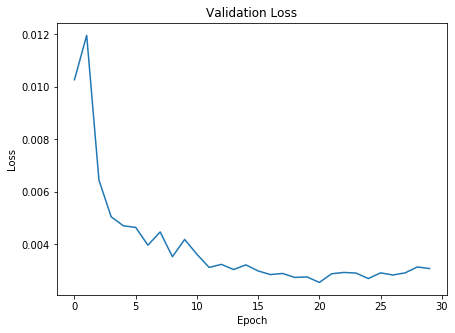

In [0]:
plot.plot_metric(losses, 'Loss')

# Plot Accuracy

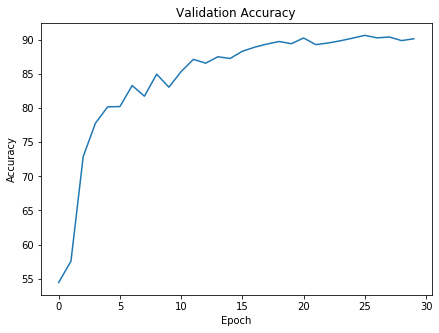

In [0]:
plot.plot_metric(accuracies, 'Accuracy')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


GroundTruth:    dog horse   car  deer


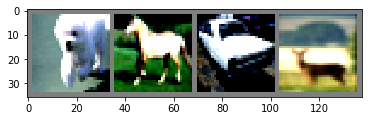

In [0]:
dataiter = iter(load_transform.testloader_for_plot)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [0]:
outputs = model(images.cuda())

In [0]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    dog horse   car  deer


# Result Analysis


In [0]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

with torch.no_grad():
    for _, (images, labels) in enumerate(load_transform.val_loader, 0):
        images, labels = images.to(device), labels.to(device)

        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()

        for i in range(len(labels)):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 96 %
Accuracy of   car : 96 %
Accuracy of  bird : 89 %
Accuracy of   cat : 72 %
Accuracy of  deer : 92 %
Accuracy of   dog : 86 %
Accuracy of  frog : 94 %
Accuracy of horse : 91 %
Accuracy of  ship : 92 %
Accuracy of truck : 91 %
